# Fisher's Linear Discriminant

- ...

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris

In [3]:
# Load dataset
iris = load_iris()
X = iris['data']
y = iris['target']
target_names = iris['target_names']

In [4]:
# Only take class 0 and 1: setosa and versicolor
X = X[y != 2]
y = y[y != 2]

## Compute Class Means

In [5]:
X0 = X[y == 0]  # Setosa
X1 = X[y == 1]  # Versicolor

mean0 = np.mean(X0, axis=0)
mean1 = np.mean(X1, axis=0)

Compute Within-Class Scatter Matrix $S_w$

In [6]:
S_w = np.cov(X0, rowvar=False) * (X0.shape[0] - 1) + \
      np.cov(X1, rowvar=False) * (X1.shape[0] - 1)

## Compute Optimal Projection Vector $w$

In [7]:
mean_diff = (mean1 - mean0).reshape(-1, 1)
S_w_inv = np.linalg.inv(S_w)
w = S_w_inv @ mean_diff  # Fisher's direction

## Project Data onto ww

In [8]:
X_proj = X @ w  # All samples projected onto 1D

## Visualize Projection

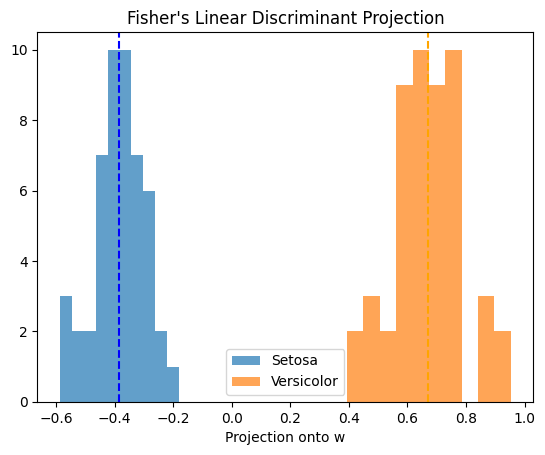

In [9]:
plt.hist(X_proj[y==0], label='Setosa', alpha=0.7)
plt.hist(X_proj[y==1], label='Versicolor', alpha=0.7)
plt.axvline(x=np.mean(X_proj[y==0]), color='blue', linestyle='--')
plt.axvline(x=np.mean(X_proj[y==1]), color='orange', linestyle='--')
plt.title("Fisher's Linear Discriminant Projection")
plt.xlabel('Projection onto w')
plt.legend()
plt.show()

## Evaluate Classification

In [10]:
threshold = (np.mean(X_proj[y==0]) + np.mean(X_proj[y==1])) / 2
y_pred = (X_proj > threshold).astype(int).flatten()

accuracy = np.mean(y_pred == y)
print(f"Classification Accuracy: {accuracy * 100:.2f}%")

Classification Accuracy: 100.00%


## References

- [Linear Discriminant Analysis (LDA)](https://righteous-guardian-68f.notion.site/Linear-Discriminant-Analysis-LDA-a12a15756fc246dfbaef71058ebab3a4?source=copy_link)